In [1]:
import zipfile
with zipfile.ZipFile('Data/mnist.zip') as zip_ref:
    zip_ref.extractall('Data/')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='Data/', as_frame = False)
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
import numpy as np
x, y = mnist['data'], mnist['target']
y = y.astype(np.int64)
print(x.shape, y.shape)

(70000, 784) (70000,)


(784,)


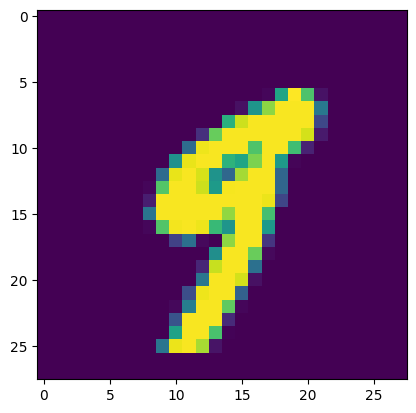

In [56]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[36000]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)  # 1차원을 2차원으로 변경
plt.imshow(some_digit_image)
plt.show()

9

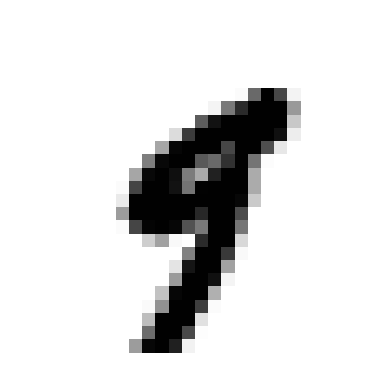

In [57]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis('off')

plot_digit(x[36000])
y[36000]

In [10]:
x_tr, x_ts, y_tr, y_ts = x[:60000], x[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
x_tr, y_tr = x_tr[shuffle_index], y_tr[shuffle_index]

In [58]:
# 이진분류기
y_tr_5 = (y_tr == 5)   # true/false
y_ts_5 = (y_ts == 5)

# 경사하강법 : 모든 샘플을 다 조사
# 확률적 경사하강법 분류모형 : 무작위로 1개 데이터 추출하여 기울기 계산, 최적점을 빠르게 찾는알고리즘

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=500, random_state=0)
sgd_clf.fit(x_tr, y_tr_5)

SGDClassifier(max_iter=500, random_state=0)

In [59]:
sgd_clf.predict([some_digit])

array([False])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_tr, y_tr_5, cv=3, scoring = 'accuracy')

array([0.9542 , 0.95765, 0.9597 ])

In [61]:
# 클래스 비율이 유지되는 교차검증

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)    # class 비율 유지해 stratify
for train_index, test_index in skfolds.split(x_tr, y_tr_5):
    # 분류모형을 복제(데이터는 복제하지않음)
    clone_clf = clone(sgd_clf)
    # 학습용, 검증용 구분
    x_tr_folds = x_tr[train_index]
    y_tr_folds = y_tr_5[train_index]
    x_ts_folds = x_tr[test_index]
    y_ts_folds = y_tr_5[test_index]

    # 학습
    clone_clf.fit(x_tr_folds, y_tr_folds)

    # 분류
    y_pred = clone_clf.predict(x_ts_folds)

    # 정확도
    n_correct = sum(y_pred == y_ts_folds)
    print(n_correct / len(y_pred))

0.9542
0.95765
0.9597


In [62]:
# 모든 예측결과를 false로 리턴하는 테스트용 클래스
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        # 2원 0배열 (행의수는 샘플개수), 0을 False로 리턴
        return np.zeros((len(x), 1), dtype=bool)  

never_5_clf = Never5Classifier()
print(never_5_clf.predict(x_tr))
cross_val_score(never_5_clf, x_tr, y_tr_5, cv=3, scoring='accuracy')
# 정확도가 높음(이미지의 10%가 5이므로 5가 아니라고 분류하면 100-10=90% 정도의 정확도를 가짐)
# 이 모형은 좋은 모형이 아님, 특히 불균형 데이터셋의 경우 정확도는 큰 의미가 없을 수 있음
# 정확도만 보는 것은 위험. classification_report를 같이 봐야 함. 


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.91055, 0.9102 , 0.9082 ])

In [64]:
from sklearn.metrics import classification_report
print(classification_report(never_5_clf.predict(x_tr), y_tr_5))   # 사실 true가 학습이 안 됨

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     60000
        True       0.00      0.00      0.00         0

    accuracy                           0.91     60000
   macro avg       0.50      0.45      0.48     60000
weighted avg       1.00      0.91      0.95     60000



c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import classification_report
print(classification_report(never_5_clf.predict(x_tr), y_tr_5))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     60000
        True       0.00      0.00      0.00         0

    accuracy                           0.91     60000
   macro avg       0.50      0.45      0.48     60000
weighted avg       1.00      0.91      0.95     60000



c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_tr_pred = sgd_clf.predict(x_tr)

# 오차행렬
cm = confusion_matrix(y_tr_5, y_tr_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[54483    96]
 [ 2954  2467]]
54483 96 2954 2467


In [24]:
from sklearn.metrics import precision_score, recall_score
# 정밀도: 모형이 1로 분류한 것중 실제로 1인 것들의 비율
print(precision_score(y_tr_5, y_tr_pred))
print(tp/(tp+fp))


# precision 모형의 정확도
# recall 

0.8756144475315238
0.8756144475315238


In [26]:
# 민감도 TPR TruePositiveRate 1을 1로 잘 맞춘 비율(재현율 recall)

print(recall_score(y_tr_5, y_tr_pred))
print(tp/(tp+fn))

0.7557646190739716
0.7557646190739716


In [27]:
# 정밀도와 재현율의 조화평균 
from sklearn.metrics import f1_score
f1_score(y_tr_5, y_tr_pred)


0.8112871287128713

In [29]:
# sgd모형의 판별함수
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-218228.37676078])

In [30]:
# 판별함수값 0을 기준으로 분류
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred 

array([False])

In [31]:
# 판별함수 결과값 조절

threshold = -417921
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred 

array([ True])

In [32]:
# 예측결과 아닌 결정점수를 리턴하는 교차검증
y_scores = cross_val_predict(sgd_clf, x_tr, y_tr_5, cv=3, method = 'decision_function')
print(y_scores)
print(y_scores.shape)

c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[ -430297.9062016  -1217220.62721014  -475990.2230788  ...
  -448682.67637267  -440864.67727815  -967801.47795873]
(60000,)


c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_tr_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth = 2)
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall', linewidth=2)
    plt.xlabel('threshold', fontsize=12)
    plt.legend(loc = 'upper left', fontsize = 12)
    plt.ylim([0,1])

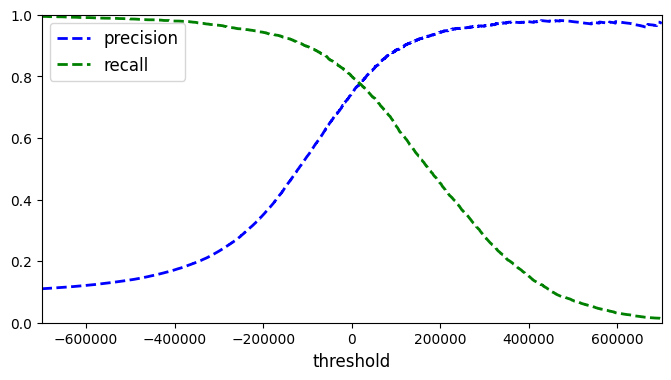

In [37]:
plt.figure(figsize = (8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()    # 반비례 관계

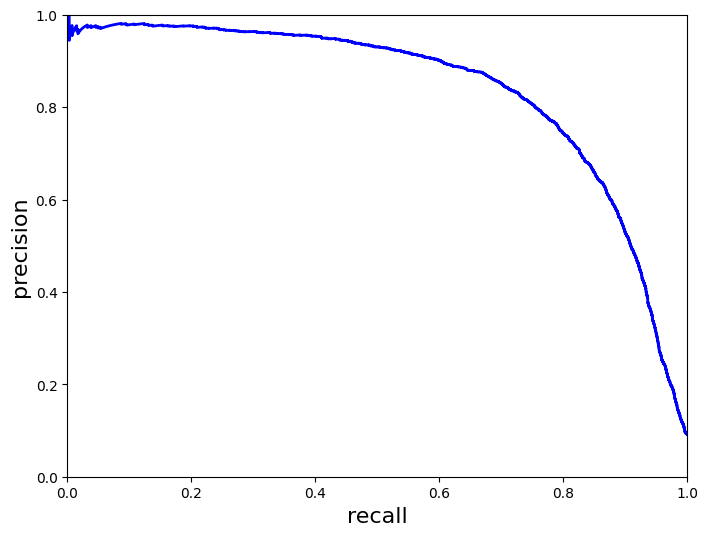

In [66]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

#precision과 recall은 반비례 관계

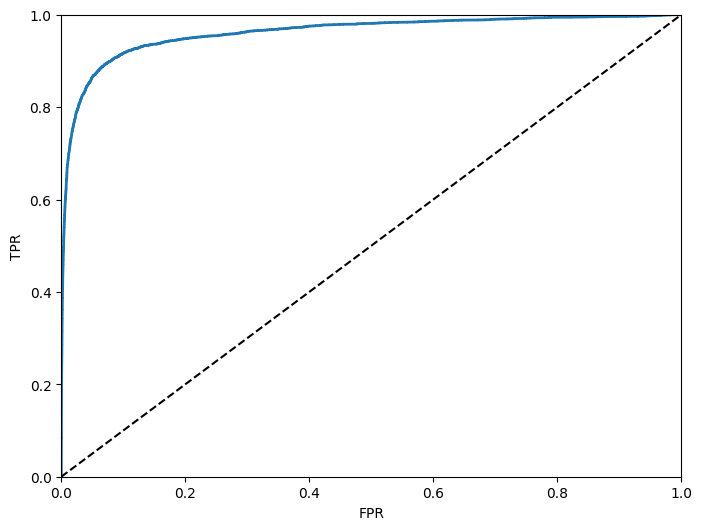

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_tr_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR', fontsize=10)
    plt.ylabel('TPR', fontsize=10)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_tr_5, y_scores)   # 면적이 1에 가까울수록 완벽한 모형, 0.5이면 완벽한 랜덤분류기

0.9613084352926183

In [43]:
# sgd 모형과 비교하기 위하여 랜덤포레스트 모형 추가
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators = 10, random_state=42)
                # 분류기수를 10개, 판별함수 없고, predict_proba 확률값임.
y_probas_forest = cross_val_predict(forest_clf, x_tr, y_tr_5, cv = 3, method='predict_proba')

In [44]:
y_probas_forest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
y_scores_forest = y_probas_forest[:,1]   # 1일확률
print(y_scores_forest)

[0. 0. 0. ... 0. 0. 0.]


In [46]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_tr_5, y_scores_forest)

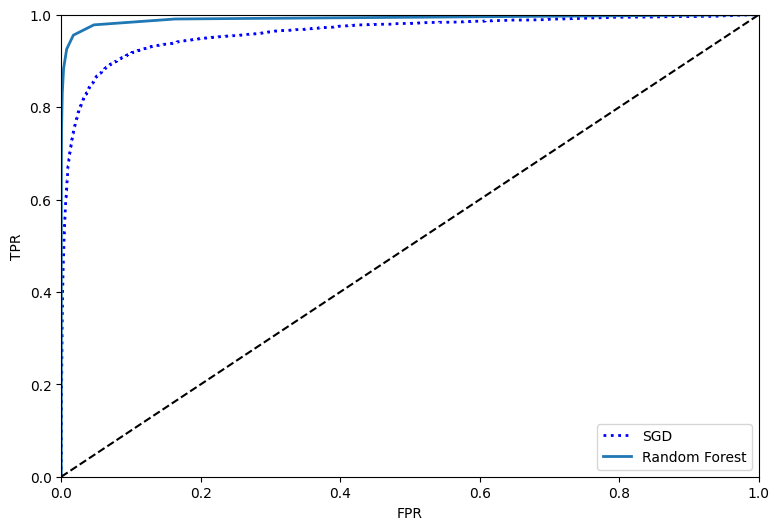

In [47]:
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right', fontsize=10)
plt.show()   # random forest가 더 좋음

In [48]:
roc_auc_score(y_tr_5, y_scores_forest)

0.991734063290362

In [49]:
y_tr_pred_forest = cross_val_predict(forest_clf, x_tr, y_tr_5, cv=3)
precision_score(y_tr_5, y_tr_pred_forest)

0.9829508196721312

In [50]:
recall_score(y_tr_5, y_tr_pred_forest)

0.8295517432208079

In [51]:
# 다중분류
sgd_clf.fit(x_tr, y_tr)     # 5 외에도 전체 다 집어넣고수행
sgd_clf.predict([some_digit])

# 내부적으로 10개의 이진분류기를 훈련시키고 각각의 결정점수 비교, max한 class를 선택

c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([4], dtype=int64)

In [52]:
# 판별함수 확인, 클래스별로 10개 점수가 출력됨
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

[[-672366.77770181 -444122.60265595 -804438.64532422 -338235.23551424
   -22660.74382569 -207942.86174743 -738683.39391168 -344630.71187154
  -473286.95697719  -83085.6651302 ]]


In [54]:
# 가장 높은 점수
print(np.argmax(some_digit_scores))

# 라벨(클래스) 리스트
print(sgd_clf.classes_)

# 분류한 라벨이름
print(sgd_clf.classes_[5])

4
[0 1 2 3 4 5 6 7 8 9]
5


In [67]:
# 1:다, 1:1
# 일대다전략(one versus all, one versus the rest): 각 분류기의 결정점수 중에서 가장 높은 것을 선택하는 전략(0만 찾는 모형, 1만 찾는 모형, 대부분의 알고리즘에서 사용하는 방식)
# 일대일전략(one versus one): 0과 1, 0과 2 등으로 각 숫자의 조합마다 여러개의 모형을 만들어서 가장 성능이 좋은 모형을 채택하는 방식(svm에서 사용하는 방식)
# 사이킷런에서는 svm일 경우 OvO(일대일전략)을 다른 분류모형일 경우 OvA(일대다전략)을 선택함, 랜덤포레스트모형은 앙상블 모형이므로 사이킷런의 OvA, OvO를 적용하지 않음

from sklearn.multiclass import OneVsOneClassifier
#일대일전략을 사용하도록 지정하는 방법
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=0))
ovo_clf.fit(x_tr, y_tr)
ovo_clf.predict([some_digit])

c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:69

array([9], dtype=int64)

In [68]:
len(ovo_clf.estimators_) #일대일전략에서 사용하는 분류기의 개수

45

In [69]:
pred=ovo_clf.predict(x_ts)
np.mean(pred == y_ts)

0.9036

In [70]:
from sklearn.multiclass import OneVsRestClassifier
# 1대다 전략(0과 1~9)
ovr_clf=OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))
ovr_clf.fit(x_tr, y_tr)

c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:69

OneVsRestClassifier(estimator=SGDClassifier(max_iter=5, random_state=10))

In [71]:
len(ovr_clf.estimators_) #분류기 개수

10

In [72]:
pred=ovr_clf.predict(x_ts)
np.mean(pred == y_ts)

0.8857

In [75]:
# 다중 레이블 분류: 학습시간이 오래 걸림

from sklearn.neighbors import KNeighborsClassifier
y_tr_large = (y_tr >= 7) #7,8,9
y_tr_odd = (y_tr % 2 == 1) #홀수
y_multilabel = np.c_[y_tr_large, y_tr_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_tr, y_multilabel)

KNeighborsClassifier()

In [76]:
knn_clf.predict([some_digit])  # 7,8,9에 해당되고  홀수이다

array([[ True,  True]])